In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
# Load Data : Load the dataset into a pandas DataFrame
health_nutrition_data = pd.read_csv('ML3 data.csv')
health_nutrition_data

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,ar16,ar17,ar18,ar19,ar20,ar21,ar22,ar23,ar24,ar25
0,73557,8,2,1,69,NaN,4,4,1,NaN,...,1.470207,4.864849,3.636711,-9.174492,-9.353410,5.153847,1.294983,-1.015693,-8.671692,5.423061
1,73558,8,2,1,54,NaN,3,3,1,NaN,...,-7.363791,-2.566326,0.776046,-2.951925,-0.538597,3.770290,6.711471,3.521875,-1.765809,-5.383746
2,73559,8,2,1,72,NaN,3,3,2,NaN,...,-7.187977,-9.730452,9.906254,7.636725,-7.642553,7.356881,-9.626078,3.871285,-1.673816,-3.973037
3,73560,8,2,1,9,NaN,3,3,1,119.0,...,-7.164299,-8.283262,0.184733,1.245878,-9.309774,1.965447,-8.320304,-6.444928,-4.297771,1.870141
4,73561,8,2,2,73,NaN,3,3,1,NaN,...,0.127513,-8.721841,0.013319,3.599418,9.263045,4.388852,6.608509,-6.813265,-9.492588,-0.342957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,8,2,1,26,NaN,2,2,2,NaN,...,-3.769219,-9.083129,-1.236402,-8.082373,-9.093733,3.688105,6.986431,-7.502831,-7.421791,-0.548241
9809,83728,8,2,2,2,24.0,1,1,2,24.0,...,-6.362523,6.958995,6.670261,-0.720513,-5.492617,-9.884320,0.798860,0.170989,-9.063173,1.373097
9810,83729,8,2,2,42,NaN,4,4,2,NaN,...,-8.465361,2.550116,2.792637,1.830711,9.818446,-4.003013,8.856587,8.600473,6.149490,6.456003
9811,83730,8,2,1,7,NaN,2,2,1,84.0,...,-6.364351,6.946665,6.685305,-0.735745,-5.504608,-9.899777,0.805068,0.186107,-9.070253,1.389257


In [3]:
# Data Dictionary : Load a data dictionary that describes the dataset.
description_data = pd.read_excel('Data_Description.xlsx')
description_data

,Variable Name,Variable Description,Data File Name,Data File Description,Begin Year,EndYear,Component,Use Constraints
0,SEQN,Respondent sequence number.,DEMO_H,Demographic Variables and Sample Weights,2013,2014,Demographics,NaN
1,SDDSRVYR,Data release cycle,DEMO_H,Demographic Variables and Sample Weights,2013,2014,Demographics,NaN
2,RIDSTATR,Interview and examination status of the partic...,DEMO_H,Demographic Variables and Sample Weights,2013,2014,Demographics,NaN
3,RIAGENDR,Gender of the participant.,DEMO_H,Demographic Variables and Sample Weights,2013,2014,Demographics,NaN
4,RIDAGEYR,Age in years of the participant at the time of...,DEMO_H,Demographic Variables and Sample Weights,2013,2014,Demographics,NaN
...,...,...,...,...,...,...,...,...
631,URDUURLC,Urinary Uranium comment code,UM_H,Metals - Urine,2013,2014,Laboratory,NaN
632,URXPREG,Pregnancy test result,UCPREG_H,Pregnancy Test - Urine,2013,2014,Laboratory,NaN
633,URXUAS,"Urinary arsenic, total (ug/L)",UTAS_H,Arsenic - Total - Urine,2013,2014,Laboratory,NaN
634,LBDB12,Vitamin B12(pg/mL),VITB12_H,Vitamin B12,2013,2014,Laboratory,NaN


In [4]:
# Initial Data Exploration : Check the shape of the data.
print(health_nutrition_data.shape)


(9813, 662)


In [5]:
# Check for any Nulls in the data
health_nutrition_data.isnull().sum()

SEQN        0
SDDSRVYR    0
RIDSTATR    0
RIAGENDR    0
RIDAGEYR    0
           ..
ar21        0
ar22        0
ar23        0
ar24        0
ar25        0
Length: 662, dtype: int64

In [6]:
# Step 5, 6, 7, 8: Data Cleaning
# Fill missing values in dietary, demographic, and laboratory columns with zeros, assuming missing values represent no response
# Here we apply it to all columns for simplicity
health_nutrition_data.fillna(0, inplace=True)

In [7]:
# Step 9: Feature Selection
# Select numerical features for clustering, dropping any non-numerical or unnecessary columns
# Assuming demographic columns and other metadata are not needed for clustering
numerical_data = health_nutrition_data.select_dtypes(include=[np.number])
numerical_data

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,ar16,ar17,ar18,ar19,ar20,ar21,ar22,ar23,ar24,ar25
0,73557,8,2,1,69,0.0,4,4,1,0.0,...,1.470207,4.864849,3.636711,-9.174492,-9.353410,5.153847,1.294983,-1.015693,-8.671692,5.423061
1,73558,8,2,1,54,0.0,3,3,1,0.0,...,-7.363791,-2.566326,0.776046,-2.951925,-0.538597,3.770290,6.711471,3.521875,-1.765809,-5.383746
2,73559,8,2,1,72,0.0,3,3,2,0.0,...,-7.187977,-9.730452,9.906254,7.636725,-7.642553,7.356881,-9.626078,3.871285,-1.673816,-3.973037
3,73560,8,2,1,9,0.0,3,3,1,119.0,...,-7.164299,-8.283262,0.184733,1.245878,-9.309774,1.965447,-8.320304,-6.444928,-4.297771,1.870141
4,73561,8,2,2,73,0.0,3,3,1,0.0,...,0.127513,-8.721841,0.013319,3.599418,9.263045,4.388852,6.608509,-6.813265,-9.492588,-0.342957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,8,2,1,26,0.0,2,2,2,0.0,...,-3.769219,-9.083129,-1.236402,-8.082373,-9.093733,3.688105,6.986431,-7.502831,-7.421791,-0.548241
9809,83728,8,2,2,2,24.0,1,1,2,24.0,...,-6.362523,6.958995,6.670261,-0.720513,-5.492617,-9.884320,0.798860,0.170989,-9.063173,1.373097
9810,83729,8,2,2,42,0.0,4,4,2,0.0,...,-8.465361,2.550116,2.792637,1.830711,9.818446,-4.003013,8.856587,8.600473,6.149490,6.456003
9811,83730,8,2,1,7,0.0,2,2,1,84.0,...,-6.364351,6.946665,6.685305,-0.735745,-5.504608,-9.899777,0.805068,0.186107,-9.070253,1.389257


In [8]:
# Step 10: Data Transformation
# Scale the numerical features using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numerical_data)
scaled_data=pd.DataFrame(scaled_data,columns=numerical_data.columns)

In [10]:
# Step 11: Optimal Cluster Identification
# Using silhouette scores and the elbow method to find the optimal number of clusters for KMeans
silhouette_scores = []
inertia_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    kmeans.fit(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))
    inertia_scores.append(kmeans.inertia_)

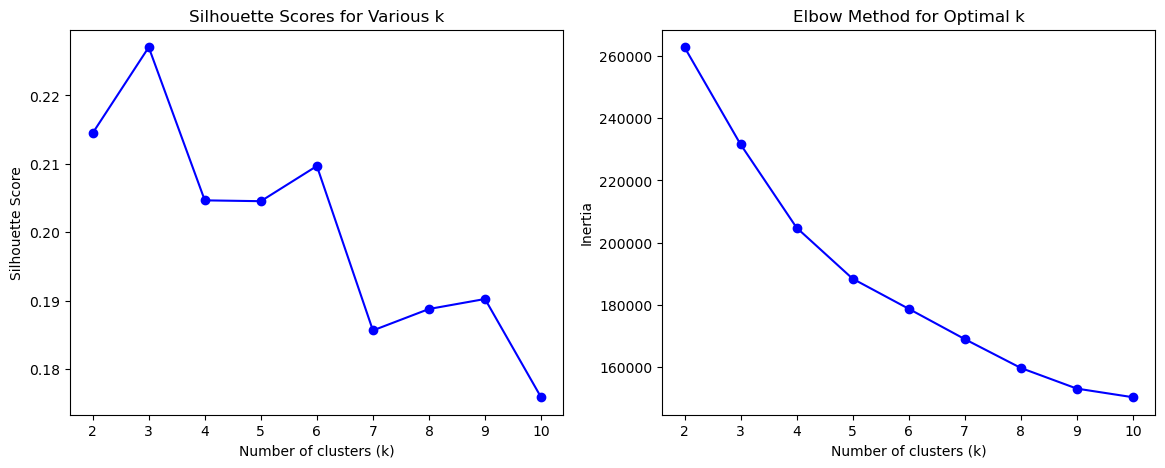

In [11]:
# Plotting silhouette scores and the elbow plot
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Various k')

plt.subplot(1, 2, 2)
plt.plot(K, inertia_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [12]:
# Choose the optimal number of clusters (e.g., k=4 based on elbow/silhouette results)
optimal_k = 4

In [14]:
# Step 12: KMeans Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42,n_init=10)
kmeans_labels = kmeans.fit_predict(scaled_data)
health_nutrition_data['KMeans_Cluster'] = kmeans_labels

In [15]:
health_nutrition_data.KMeans_Cluster.value_counts()

KMeans_Cluster
2    3122
0    2800
1    2023
3    1868
Name: count, dtype: int64

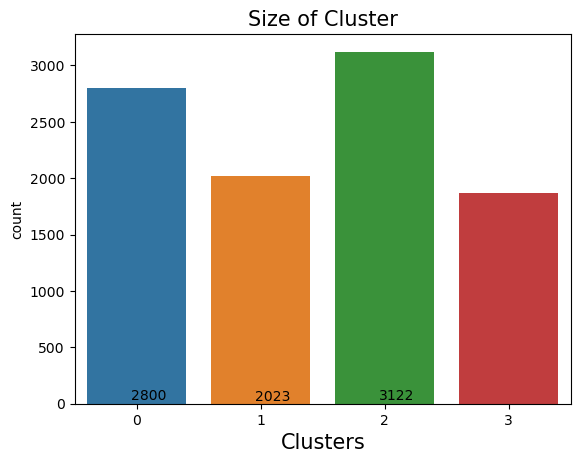

In [16]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data = health_nutrition_data, x = 'KMeans_Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
#plt.ylabel('Number of Customers', fontsize = 15)

# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.05, y =39, s = np.unique(kmeans.labels_, return_counts=True)[1][0])
plt.text(x = 0.95, y =24, s = np.unique(kmeans.labels_, return_counts=True)[1][1])
plt.text(x = 1.95, y =37, s = np.unique(kmeans.labels_, return_counts=True)[1][2])

# display the plot
plt.show()

In [17]:
# Step 13: Correlation Analysis
# Analyzing correlation of features with the cluster labels
correlation_matrix = health_nutrition_data.corr()
correlation_with_clusters = correlation_matrix['KMeans_Cluster'].sort_values(ascending=False)
print("Top correlations with cluster labels:\n", correlation_with_clusters)

Top correlations with cluster labels:
 KMeans_Cluster    1.000000
ORXH64            0.867476
ORXH26            0.867459
ORXH11            0.867459
ORXH40            0.867459
                    ...   
LBDBPBLC               NaN
LBDBSELC               NaN
LBDBMNLC               NaN
URDUCSLC               NaN
URDUMOLC               NaN
Name: KMeans_Cluster, Length: 663, dtype: float64


In [24]:
# Step 14: Principal Component Analysis (PCA)
# Reducing dimensionality to retain 95% of the variance
pca = PCA(n_components = scaled_data.shape[1])
pca_data = pca.fit_transform(scaled_data)
exp_var_ratio= pca.explained_variance_ratio_
exp_var_ratio.round(3)

cum_var=exp_var_ratio[0]
itr=2 # defined as two as first pc1 variance defined outside the loop
for j in exp_var_ratio[1:]:
    cum_var=cum_var+j
    if cum_var >= 0.95:
        break
    itr=itr+1

print('The number of principle components capturing 95 percent varaition is data is : ',itr,' Varaince explained is ', cum_var)

The number of principle components capturing 95 percent varaition is data is :  79  Varaince explained is  0.9503173656303411


In [25]:
# Step 14: Principal Component Analysis (PCA)
# Reducing dimensionality to retain 95% of the variance
#pca = PCA(n_components=0.95, random_state=42)
#pca_components = pca.fit_transform(scaled_data)
#print(f"Number of components to retain 95% variance: {pca.n_components_}")

In [36]:
itr

79

In [27]:
X = pca_components[:,0:itr]
X.shape

(9813, 79)

In [28]:
# Step 15: KMeans with PCA
# Applying KMeans clustering on the principal components
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42,n_init=10)
kmeans_pca_labels = kmeans_pca.fit_predict(X)

In [30]:
health_nutrition_data['KMeans_Cluster_PCA'] = kmeans_pca_labels
health_nutrition_data.KMeans_Cluster_PCA.value_counts()

KMeans_Cluster_PCA
2    3122
1    2800
3    2023
0    1868
Name: count, dtype: int64

In [31]:
health_nutrition_data.KMeans_Cluster.value_counts()

KMeans_Cluster
2    3122
0    2800
1    2023
3    1868
Name: count, dtype: int64

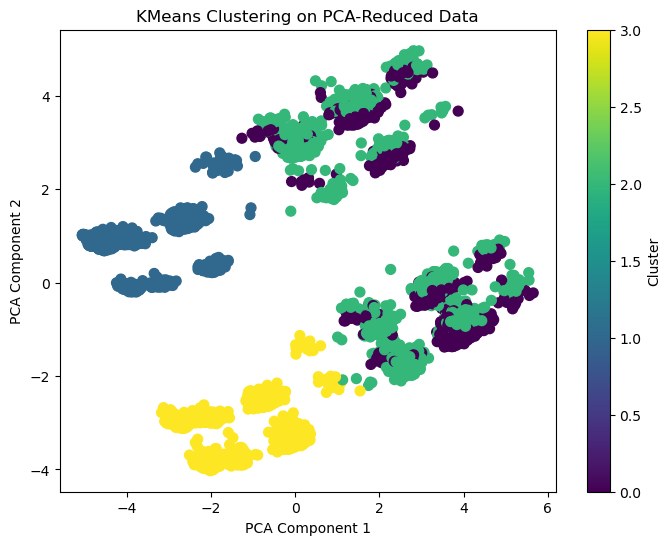

In [37]:
# Visualizing clusters in a 2D scatter plot (first two principal components)
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=kmeans_pca_labels, cmap='viridis', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering on PCA-Reduced Data')
plt.colorbar(label='Cluster')
plt.show()

In [32]:
# Step 16: DBSCAN Clustering
# Applying DBSCAN clustering on the PCA components
dbscan = DBSCAN(eps=4.3, min_samples=90)
dbscan_labels = dbscan.fit_predict(X)

In [34]:
health_nutrition_data['DBSCAN_Cluster_PCA'] = dbscan_labels
health_nutrition_data.DBSCAN_Cluster_PCA.value_counts()

DBSCAN_Cluster_PCA
 1    4996
 0    3047
 2     726
 3     648
-1     396
Name: count, dtype: int64

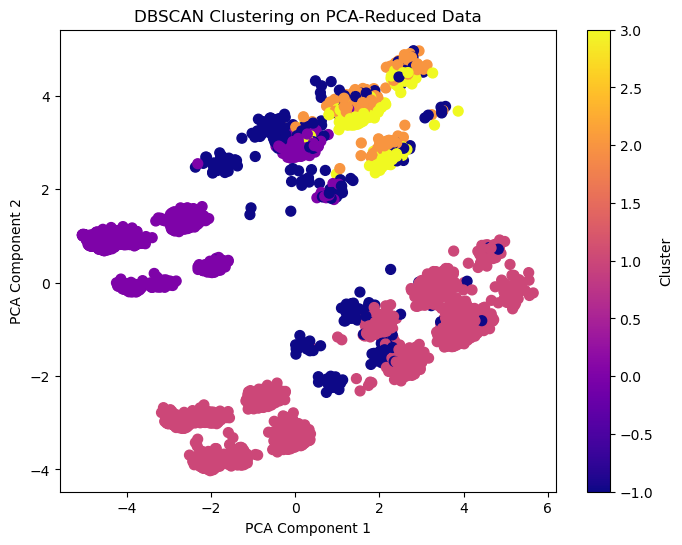

In [38]:
# Visualize DBSCAN results
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=dbscan_labels, cmap='plasma', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering on PCA-Reduced Data')
plt.colorbar(label='Cluster')
plt.show()

In [35]:
# Step 17: Conclusion
# Summarize findings
print("KMeans clustering labels:", np.unique(kmeans_labels))
print("DBSCAN clustering labels:", np.unique(dbscan_labels))
print("Clustering analysis complete.")

KMeans clustering labels: [0 1 2 3]
DBSCAN clustering labels: [-1  0  1  2  3]
Clustering analysis complete.


We used National Health and Nutrition Examination Survey (NHANES) datasets including demographic, socioeconomic, dietary, and health-related datasets. We performed the following steps:

Conducted data cleaning, imputed missing values, created new features and transformed the data into a uniform format.

Standardized the clean data, identified three components that explained the majority of variance in data, and performed dimensionality reduction by PCA as a preprocessing step prior to data segmentation.

Determined four separate clusters as the most representative types of diseases affecting sample patients by K-means algorithm. Implemented K-means clustering and visualized clusters by principal components.
